In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Data Import

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\ML\ML_projects\customer_churn_prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")


# Initial Inspection

In [3]:
pd.set_option("display.max_columns", None)
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2422,9603-OAIHC,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,No
5306,5940-NFXKV,Male,0,Yes,Yes,19,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.65,1465.75,Yes
1299,4566-QVRRW,Female,0,Yes,No,11,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.05,483.7,Yes


In [4]:
df = df.drop("customerID", axis = 1)

In [5]:
df.shape

(7043, 20)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns
df = df.rename({"seniorcitizen": "senior_citizen", "phoneservice": "phone_service", "multiplelines": "multiple_lines", "internetservice": "internet_service", "onlinesecurity": "online_security", "onlinebackup": "online_backup", "deviceprotection": "device_protection", "techsupport": "tech_support", "streamingtv": "streaming_tv", "streamingmovies": "streaming_movies", "paperlessbilling": "paperless_billing", "paymentmethod": "payment_method", "monthlycharges": "monthly_charges", "totalcharges": "total_charges"}, axis = 1)
df.sample(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
3025,Male,0,Yes,Yes,67,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.9,No
4156,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.75,19.75,No


In [9]:
temp_var = pd.to_numeric(df["total_charges"], errors = "coerce")
print(df.shape[0], temp_var.isna().sum())

7043 11


In [10]:
df["total_charges"] = pd.to_numeric(df["total_charges"], errors = "coerce")
df["total_charges"] = df["total_charges"].fillna(df["total_charges"].median())
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [11]:
cat_cols = ['gender', 'senior_citizen', 'partner', 'dependents','phone_service', 'multiple_lines', 'internet_service','online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method']
num_cols = ['tenure', 'monthly_charges', 'total_charges']

df[num_cols].describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Numerical feature's Spread

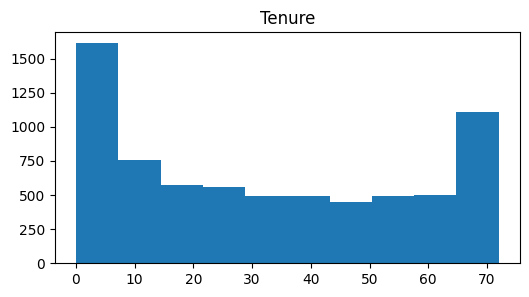

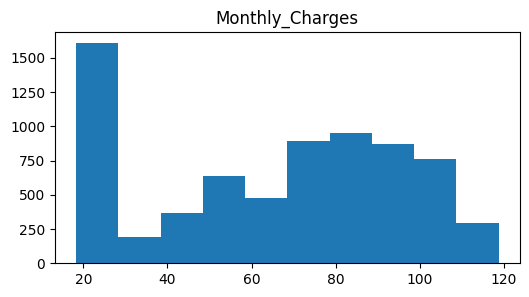

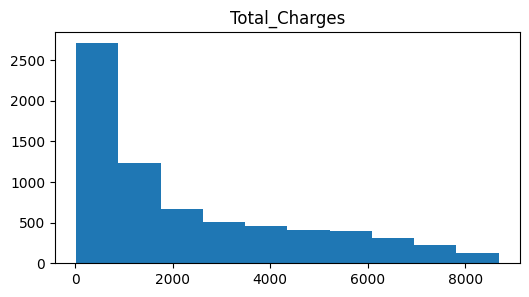

In [12]:
for col in num_cols:
  plt.figure(figsize=(6, 3))
  plt.hist(df[col])
  plt.title(f"{col.title()}")

# Categorical feature's Distribution

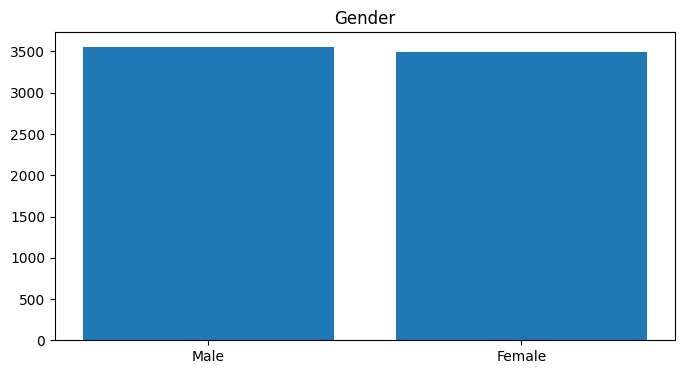

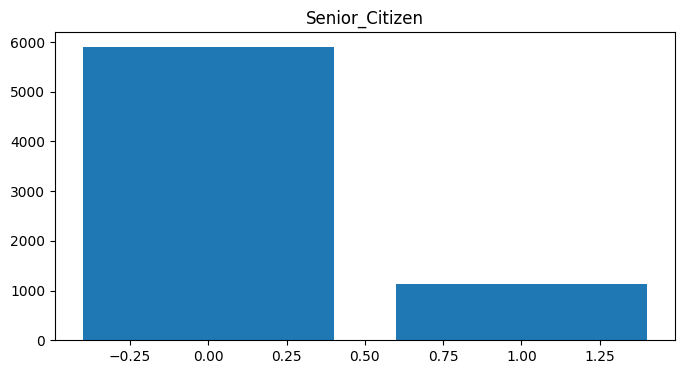

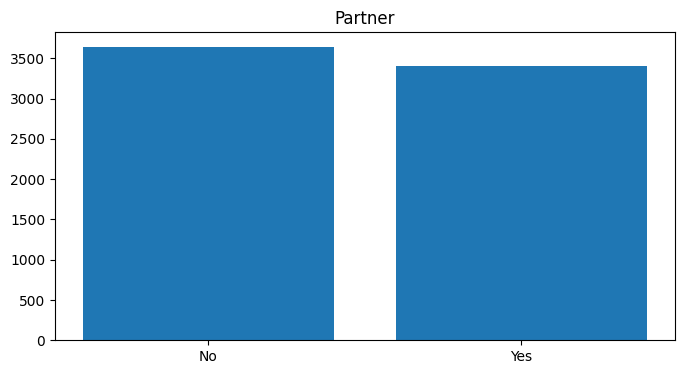

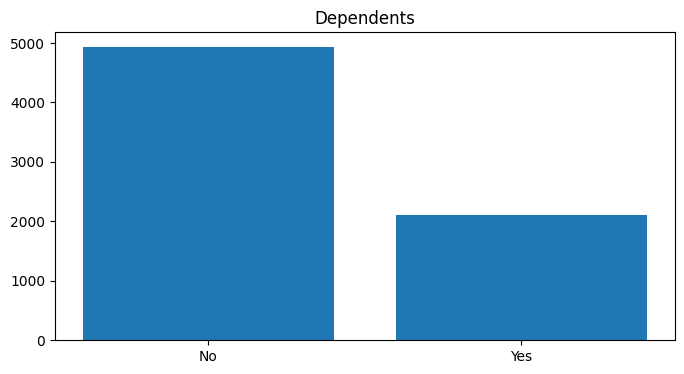

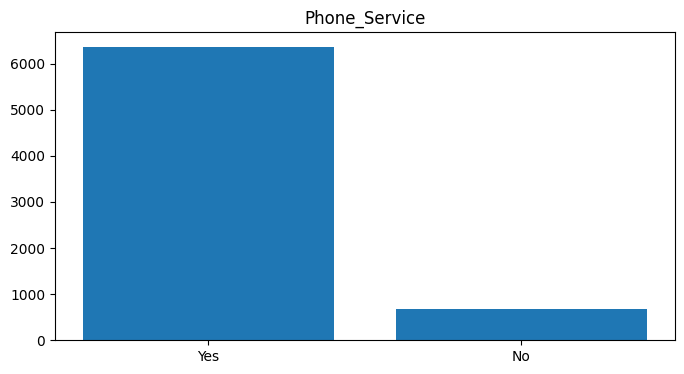

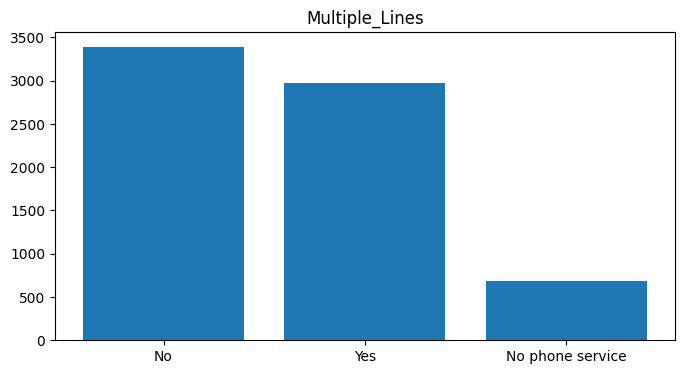

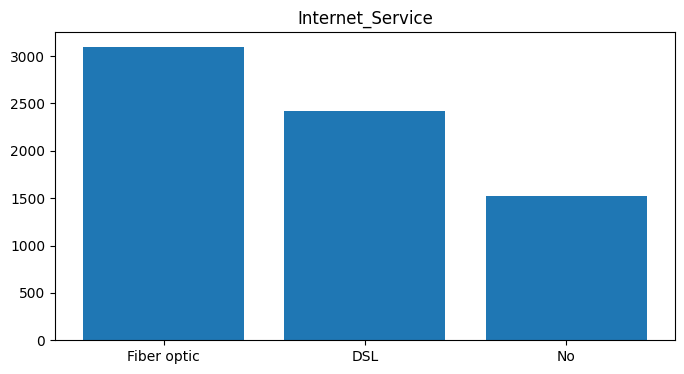

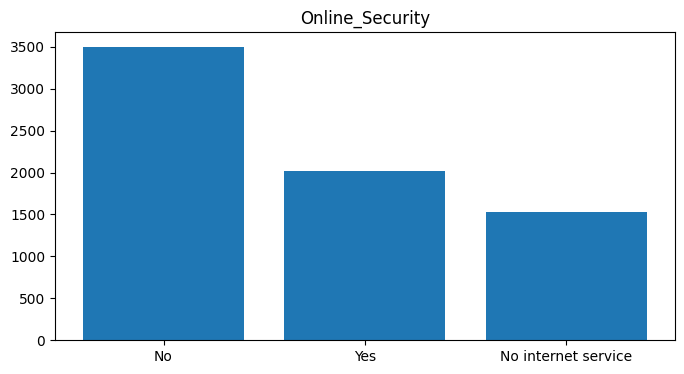

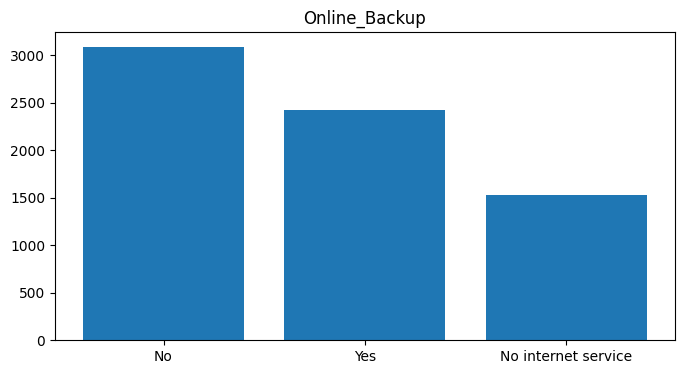

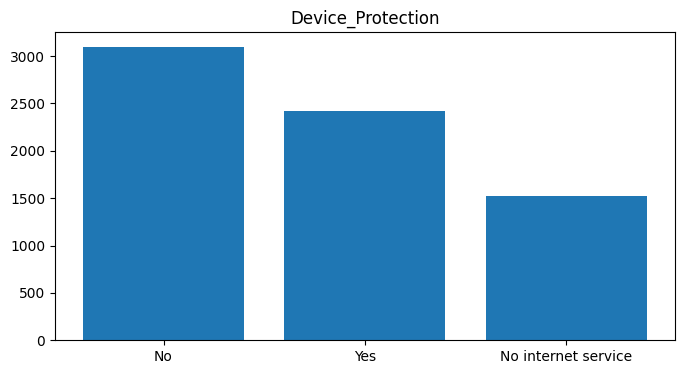

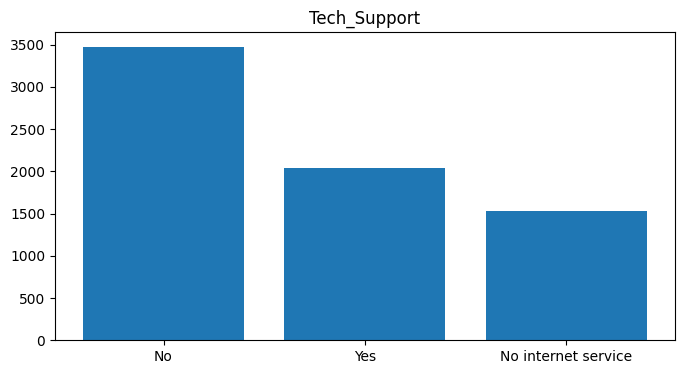

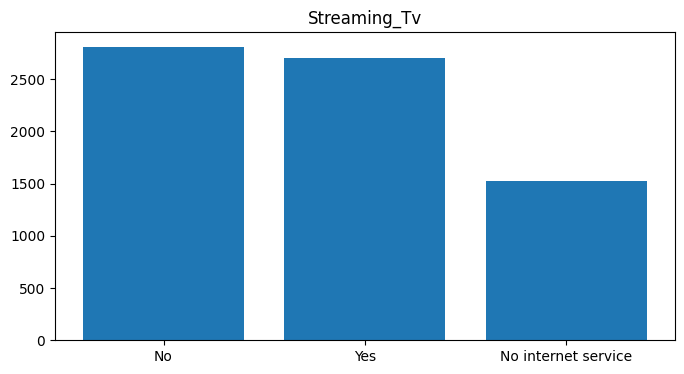

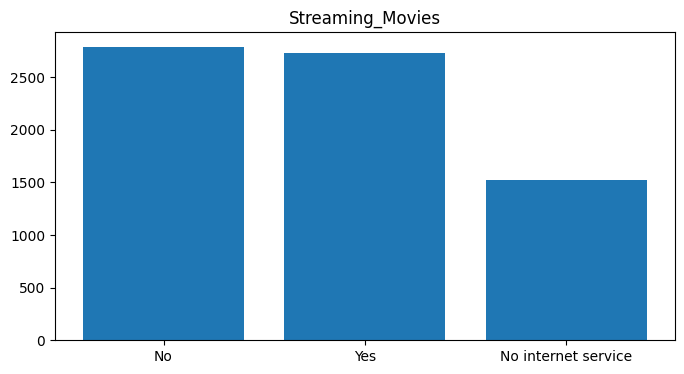

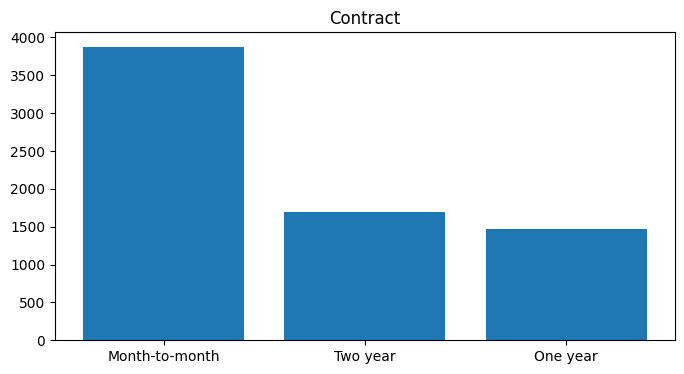

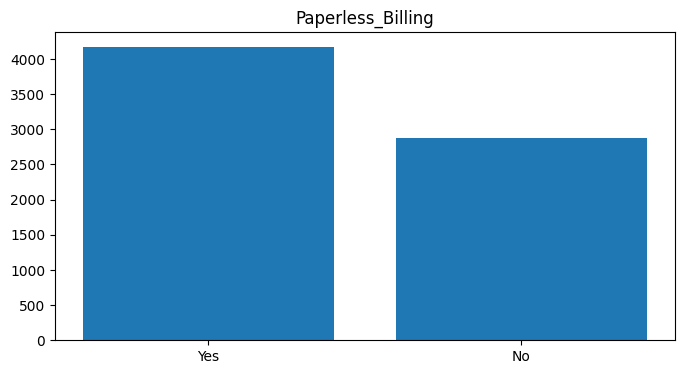

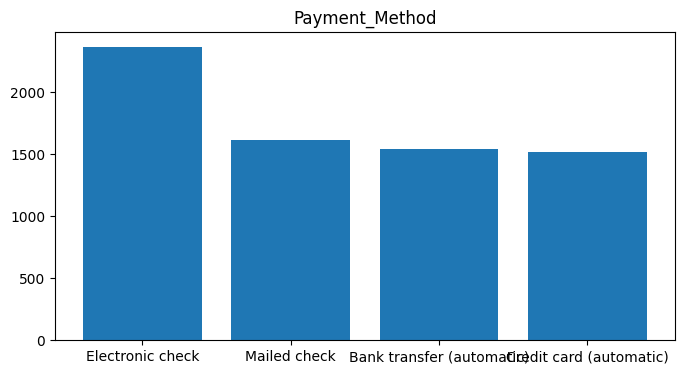

In [13]:
for col in cat_cols:
  df_col = pd.DataFrame(df[col].value_counts().reset_index())
  plt.figure(figsize=(8, 4))
  plt.bar(df_col.iloc[:, 0], df_col.iloc[:, 1])
  plt.title(f"{col.title()}")

In [14]:
for col in cat_cols:
  print(round(df[col].value_counts(normalize=True)*100, 2))

gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64
senior_citizen
0    83.79
1    16.21
Name: proportion, dtype: float64
partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64
dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64
phone_service
Yes    90.32
No      9.68
Name: proportion, dtype: float64
multiple_lines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64
internet_service
Fiber optic    43.96
DSL            34.37
No             21.67
Name: proportion, dtype: float64
online_security
No                     49.67
Yes                    28.67
No internet service    21.67
Name: proportion, dtype: float64
online_backup
No                     43.84
Yes                    34.49
No internet service    21.67
Name: proportion, dtype: float64
device_protection
No                     43.94
Yes                    34.39
No internet service    21.67
Name: proportion, dtype: float64
tec

# Checking For Outliers In Numerical Columns

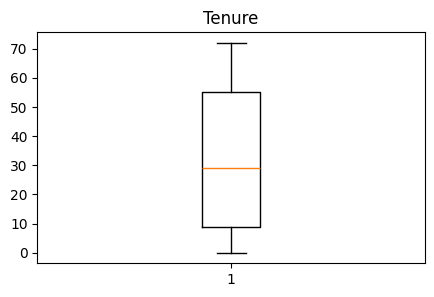

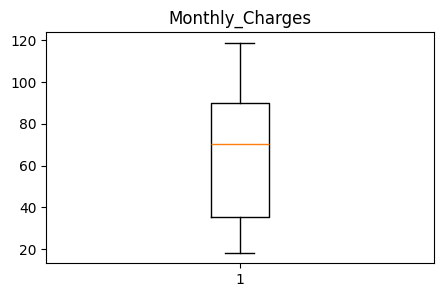

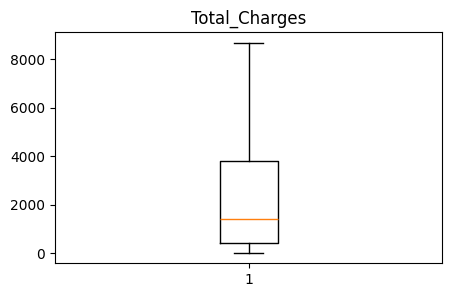

In [15]:
for col in num_cols:
  plt.figure(figsize=(5, 3))
  plt.boxplot(df[col])
  plt.title(f"{col.title()}")

# Categorizing Binary, Multiclass and Numeric features

In [16]:
df = df.replace("No internet service", "No")
df = df.replace("No phone service", "No")

In [17]:
binary_cols = []
multi_cols = []
numeric_cols = []
for col in df.columns[:-1]:
  if len(df[col].unique())==2:
    binary_cols.append(col)
    binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
    df[col] = df[col].replace(binary_mapping)
  elif len(df[col].unique())>2 and len(df[col].unique())<10:
    multi_cols.append(col)
  else:
    numeric_cols.append(col)
print(binary_cols)
print(multi_cols)
print(numeric_cols)

['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
['internet_service', 'contract', 'payment_method']
['tenure', 'monthly_charges', 'total_charges']


C:\Users\admin\AppData\Local\Temp\ipykernel_19240\3808710698.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_mapping)


# Data Splitting, Encoding, Scaling

In [18]:
X, y_raw = df.iloc[:, :-1], df.iloc[:, -1]

l_encoder = LabelEncoder()
y = l_encoder.fit_transform(y_raw)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = .7, random_state = 42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= .5, random_state = 42, shuffle = True)
ohe_encoder = OneHotEncoder(handle_unknown = "ignore")
scaler = StandardScaler()

prep = ColumnTransformer(
    transformers= [
        ("multi_cols", ohe_encoder, multi_cols),
        ("numeric_cols", scaler, numeric_cols)
    ],
    remainder = "passthrough"
)

# Model 1) Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(Cs = [.001, .01, .1, 1, 5, 10, 100], cv = 5, random_state = 42, penalty = "l2", class_weight="balanced")

lr_pipeline = Pipeline([
    ("prep", prep),
    ("model", lr_model)
])

lr_pipeline.fit(X_train, y_train)

train_pred, val_pred, test_pred = lr_pipeline.predict(X_train), lr_pipeline.predict(X_val), lr_pipeline.predict(X_test)
train_report, val_report, test_report = classification_report(y_train, train_pred), classification_report(y_val, val_pred), classification_report(y_test, test_pred)
print("train", train_report, sep = "\n")
print("valid", val_report, sep = "\n")
print("test", test_report, sep = "\n")

train
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3635
           1       0.51      0.78      0.62      1295

    accuracy                           0.75      4930
   macro avg       0.71      0.76      0.71      4930
weighted avg       0.80      0.75      0.76      4930

valid
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       778
           1       0.52      0.82      0.64       278

    accuracy                           0.76      1056
   macro avg       0.72      0.78      0.73      1056
weighted avg       0.81      0.76      0.77      1056

test
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       761
           1       0.55      0.81      0.65       296

    accuracy                           0.76      1057
   macro avg       0.73      0.78      0.73      1057
weighted avg       0.81      0.76      0.77      1057



## Performance Visualization

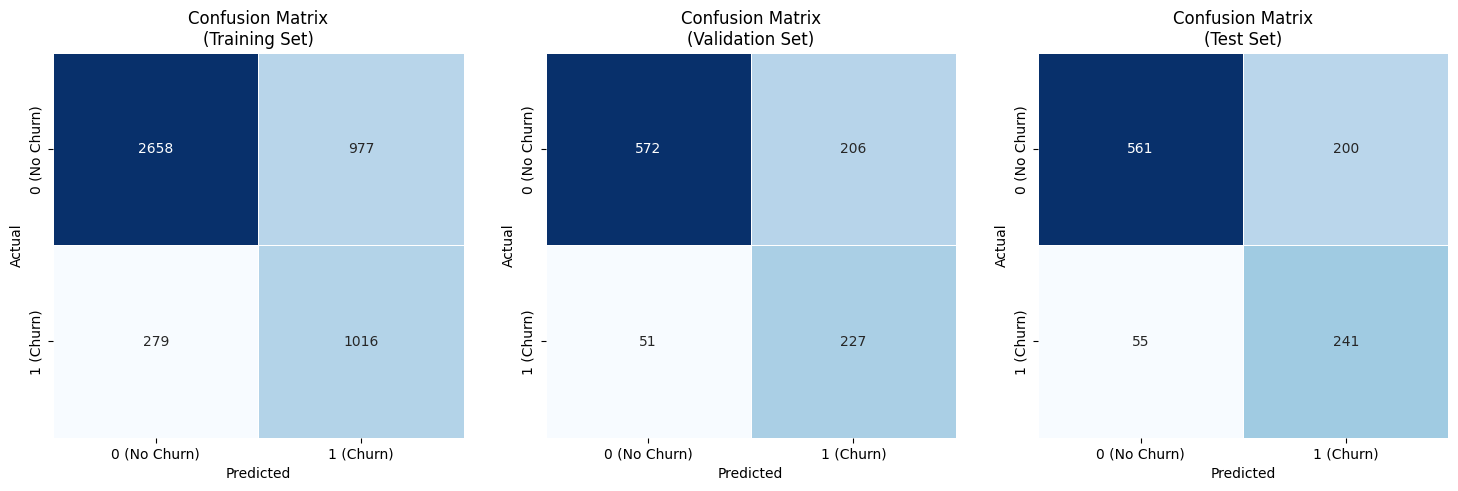

In [20]:
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_test = confusion_matrix(y_test, test_pred)

matrices = [cm_train, cm_val, cm_test]
titles = ['Training Set', 'Validation Set', 'Test Set']
labels = ['0 (No Churn)', '1 (Churn)']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, cm in enumerate(matrices):
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                cbar=False,
                fmt="d",
                linewidths=.5,
                xticklabels=labels,
                yticklabels=labels,
                ax=ax[i]
               )
    ax[i].set_title(f'Confusion Matrix\n({titles[i]})')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()

# Model 2) SVC(Support Vector Machine)

In [21]:
from sklearn.svm import SVC

svc_model = SVC(probability = True, random_state =42, class_weight = "balanced", kernel="rbf")

svc_pipeline = Pipeline([
    ("prep", prep),
    ("model", svc_model)
])

param_grid = {
    "model__C": [.1, 1, 5, 15, 100]
}

grid = GridSearchCV(
    estimator= svc_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs = -1
)
grid.fit(X_train, y_train)

svc_model = grid.best_estimator_

train_pred, val_pred, test_pred = svc_model.predict(X_train), svc_model.predict(X_val), svc_model.predict(X_test)
train_report, val_report, test_report = classification_report(y_train, train_pred), classification_report(y_val, val_pred), classification_report(y_test, test_pred)
print("train", train_report, sep = "\n")
print("valid", val_report, sep = "\n")
print("test", test_report, sep = "\n")

train
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3635
           1       0.53      0.82      0.64      1295

    accuracy                           0.76      4930
   macro avg       0.73      0.78      0.73      4930
weighted avg       0.82      0.76      0.77      4930

valid
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       778
           1       0.52      0.81      0.64       278

    accuracy                           0.75      1056
   macro avg       0.72      0.77      0.73      1056
weighted avg       0.81      0.75      0.77      1056

test
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       761
           1       0.54      0.82      0.65       296

    accuracy                           0.76      1057
   macro avg       0.73      0.78      0.73      1057
weighted avg       0.81      0.76      0.77      1057



## Performance Visualization

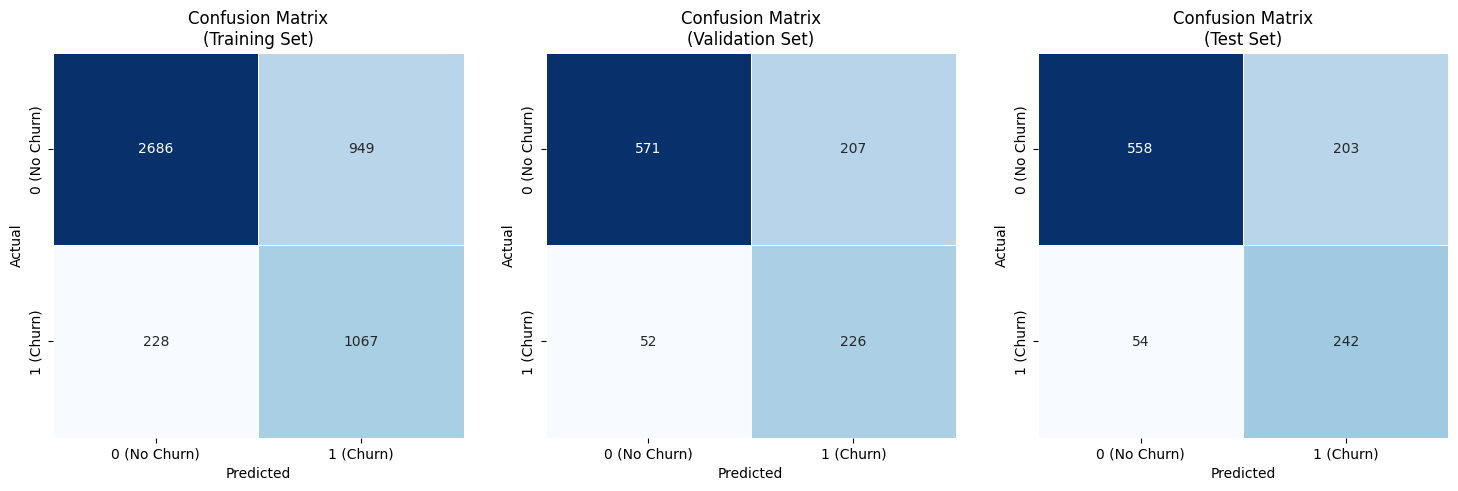

In [22]:
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_test = confusion_matrix(y_test, test_pred)

matrices = [cm_train, cm_val, cm_test]
titles = ['Training Set', 'Validation Set', 'Test Set']
labels = ['0 (No Churn)', '1 (Churn)']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, cm in enumerate(matrices):
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                cbar=False,
                fmt="d",
                linewidths=.5,
                xticklabels=labels,
                yticklabels=labels,
                ax=ax[i]
               )
    ax[i].set_title(f'Confusion Matrix\n({titles[i]})')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()

# Model 3) Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42, class_weight = "balanced", splitter= "best")

dt_pipeline = Pipeline([
    ("prep", prep),
    ("model", dt_model)
])

param_grid = {
    "model__max_depth": [2, 5, 50],
    "model__min_samples_split": [5, 2, 1, 10],
    "model__min_samples_leaf": [2, 10, 50, 200],
    "model__max_features": ["sqrt", .2, .5, .8],
    "model__criterion": ["gini", "entropy"]

}
random_search = RandomizedSearchCV(
    n_iter = 50,
    estimator = dt_pipeline,
    param_distributions = param_grid,
    cv = 5,
    scoring = "f1",
    n_jobs = -1
)
random_search.fit(X_train, y_train)

dt_model = random_search.best_estimator_

train_pred, val_pred, test_pred = dt_model.predict(X_train), dt_model.predict(X_val), dt_model.predict(X_test)
train_report, val_report, test_report = classification_report(y_train, train_pred), classification_report(y_val, val_pred), classification_report(y_test, test_pred)
print("train", train_report, sep = "\n")
print("valid", val_report, sep = "\n")
print("test", test_report, sep = "\n")

train
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      3635
           1       0.50      0.84      0.63      1295

    accuracy                           0.74      4930
   macro avg       0.71      0.77      0.71      4930
weighted avg       0.81      0.74      0.75      4930

valid
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       778
           1       0.49      0.85      0.62       278

    accuracy                           0.73      1056
   macro avg       0.71      0.77      0.71      1056
weighted avg       0.81      0.73      0.75      1056

test
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       761
           1       0.51      0.82      0.63       296

    accuracy                           0.73      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.80      0.73      0.74      1057



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\admin\AppDa

## Performance Visualization

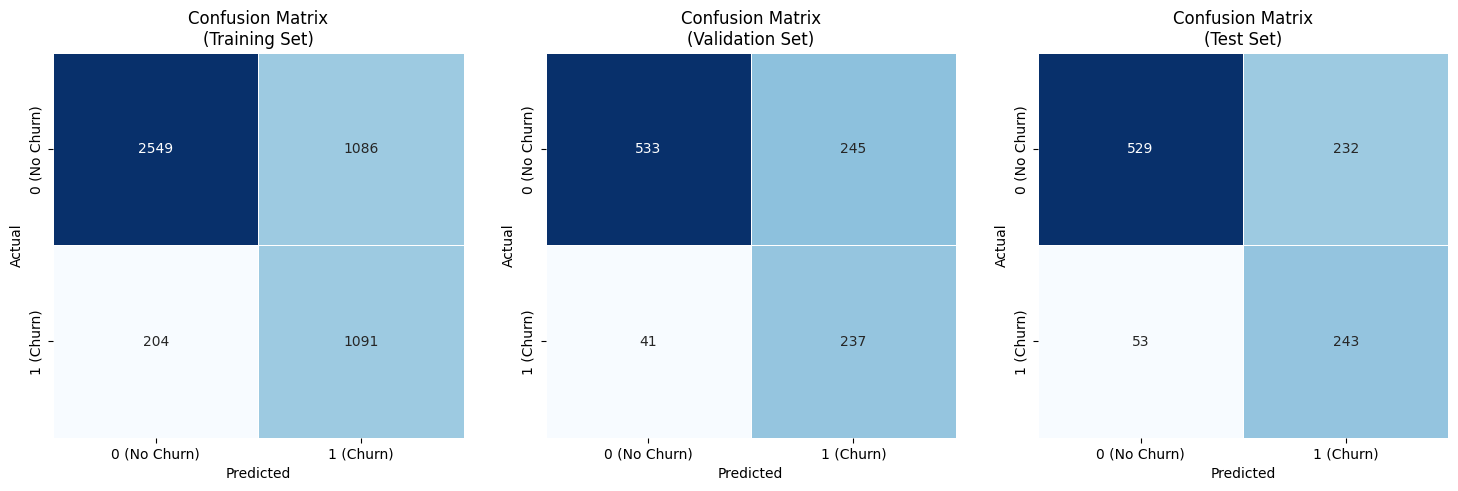

In [24]:
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_test = confusion_matrix(y_test, test_pred)

matrices = [cm_train, cm_val, cm_test]
titles = ['Training Set', 'Validation Set', 'Test Set']
labels = ['0 (No Churn)', '1 (Churn)']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, cm in enumerate(matrices):
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                cbar=False,
                fmt="d",
                linewidths=.5,
                xticklabels=labels,
                yticklabels=labels,
                ax=ax[i]
               )
    ax[i].set_title(f'Confusion Matrix\n({titles[i]})')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()

# Model 4) Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42, class_weight = "balanced")

rf_pipeline = Pipeline([
    ("prep", prep),
    ("model", rf_model)
])

param_grid = {
    "model__n_estimators": [50, 100, 150],
    "model__max_depth": [2, 5, 10, 25, 50],
    "model__min_samples_split": [2, 5, 10, 20, 30, 50],
    "model__min_samples_leaf": [1, 5, 10, 30, 50, 100],
    "model__max_features": ["sqrt", .2, .5, .8],
    "model__criterion": ["gini", "entropy"]
}
random_search = RandomizedSearchCV(
    n_iter = 50,
    param_distributions = param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = "f1",
    estimator = rf_pipeline
)
random_search.fit(X_train, y_train)

rf_model = random_search.best_estimator_

train_pred, val_pred, test_pred = rf_model.predict(X_train), rf_model.predict(X_val), rf_model.predict(X_test)
train_report, val_report, test_report = classification_report(y_train, train_pred), classification_report(y_val, val_pred), classification_report(y_test, test_pred)
print("train", train_report, sep = "\n")
print("valid", val_report, sep = "\n")
print("test", test_report, sep = "\n")

train
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3635
           1       0.60      0.84      0.70      1295

    accuracy                           0.81      4930
   macro avg       0.77      0.82      0.78      4930
weighted avg       0.85      0.81      0.82      4930

valid
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       778
           1       0.55      0.79      0.65       278

    accuracy                           0.78      1056
   macro avg       0.73      0.78      0.74      1056
weighted avg       0.82      0.78      0.79      1056

test
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       761
           1       0.57      0.79      0.66       296

    accuracy                           0.78      1057
   macro avg       0.74      0.78      0.75      1057
weighted avg       0.81      0.78      0.78      1057



## Performance Visualization

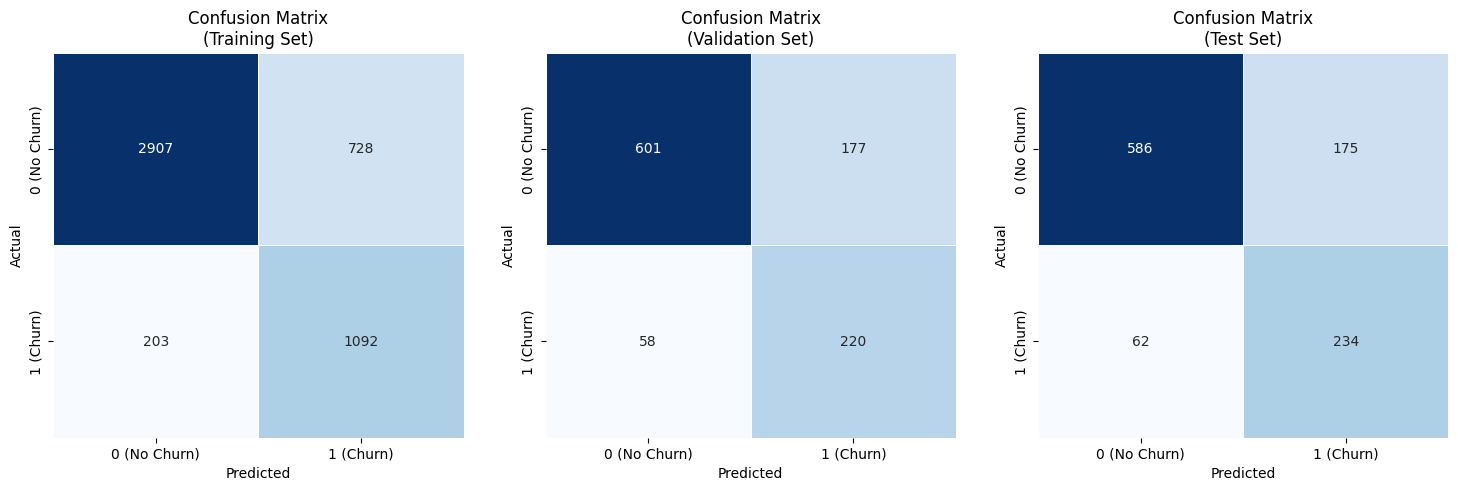

In [26]:
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_test = confusion_matrix(y_test, test_pred)

matrices = [cm_train, cm_val, cm_test]
titles = ['Training Set', 'Validation Set', 'Test Set']
labels = ['0 (No Churn)', '1 (Churn)']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, cm in enumerate(matrices):
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                cbar=False,
                fmt="d",
                linewidths=.5,
                xticklabels=labels,
                yticklabels=labels,
                ax=ax[i]
               )
    ax[i].set_title(f'Confusion Matrix\n({titles[i]})')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()

# Model 5) XGBoost Classifier

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight = pd.DataFrame(y_train).value_counts()[0]/pd.DataFrame(y_train).value_counts()[1], random_state = 42)

xgb_pipeline = Pipeline([
    ("prep", prep),
    ("model", xgb_model)
])
param_grid = {
    "model__n_estimators": [50, 100, 150],
    "model__max_depth": [2, 5, 8, 12],
    "model__min_child_weight": [1, 5, 10, 25, 50],
    "model__gamma": [0, .2, .5, 1, 5],
    "model__max_leaves": [2, 5, 10, 20, 50],
    "model__learning_rate": [.01, .05, .1, .2, .5, .8],
    "model__subsample": [.2, .4, .6, .8],
    "model__colsample_bytree": [.5, .8, .3],
    "model__lambda": [.1, .5, 1, 5, 10],
    "model__reg_alpha": [0, .001, .01, .1, 1]
}
random_search = RandomizedSearchCV(
    n_iter = 50,
    cv = 3,
    param_distributions = param_grid,
    scoring = "f1",
    n_jobs = -1,
    estimator = xgb_pipeline
)
random_search.fit(X_train, y_train)

xgb_model = random_search.best_estimator_

train_pred, val_pred, test_pred = xgb_model.predict(X_train), xgb_model.predict(X_val), xgb_model.predict(X_test)
train_report, val_report, test_report = classification_report(y_train, train_pred), classification_report(y_val, val_pred), classification_report(y_test, test_pred)
print("train", train_report, sep = "\n")
print("valid", val_report, sep = "\n")
print("test", test_report, sep = "\n")

train
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      3635
           1       0.53      0.83      0.65      1295

    accuracy                           0.77      4930
   macro avg       0.73      0.79      0.74      4930
weighted avg       0.82      0.77      0.78      4930

valid
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       778
           1       0.52      0.83      0.64       278

    accuracy                           0.76      1056
   macro avg       0.72      0.78      0.73      1056
weighted avg       0.82      0.76      0.77      1056

test
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       761
           1       0.55      0.83      0.66       296

    accuracy                           0.76      1057
   macro avg       0.73      0.78      0.74      1057
weighted avg       0.81      0.76      0.77      1057



## Performance Visualization

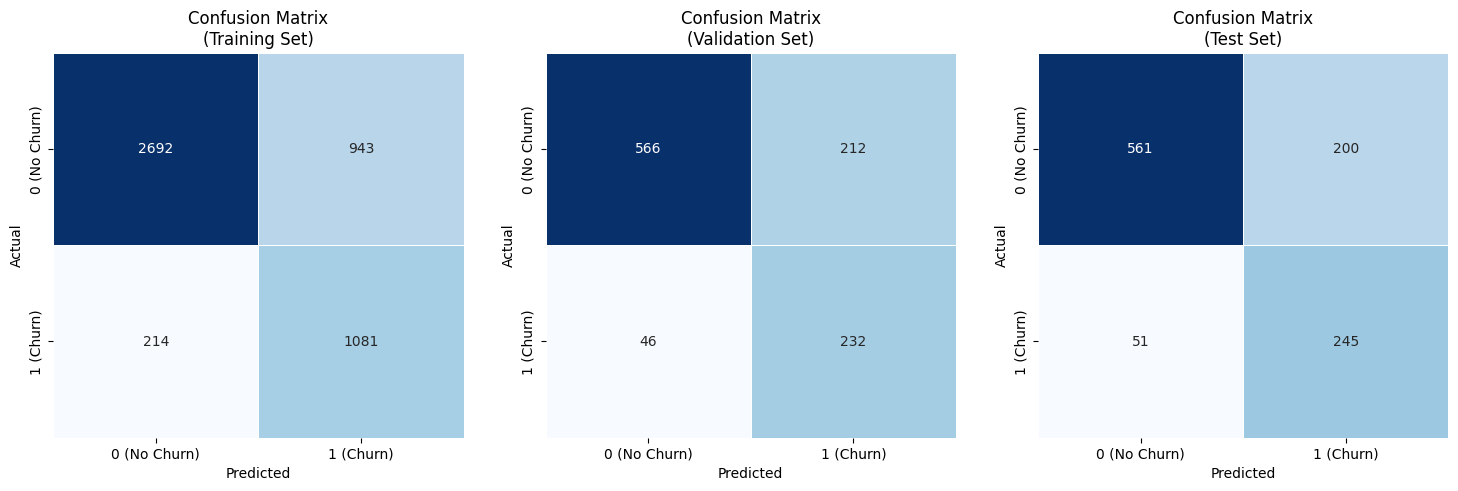

In [28]:
cm_train = confusion_matrix(y_train, train_pred)
cm_val = confusion_matrix(y_val, val_pred)
cm_test = confusion_matrix(y_test, test_pred)

matrices = [cm_train, cm_val, cm_test]
titles = ['Training Set', 'Validation Set', 'Test Set']
labels = ['0 (No Churn)', '1 (Churn)']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, cm in enumerate(matrices):
    sns.heatmap(cm,
                annot=True,
                cmap="Blues",
                cbar=False,
                fmt="d",
                linewidths=.5,
                xticklabels=labels,
                yticklabels=labels,
                ax=ax[i]
               )
    ax[i].set_title(f'Confusion Matrix\n({titles[i]})')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()

# Best Model - Random Forest Classifier

"Class imbalance affected recall on churn class"

"Random Forest performed better than all other models"

### Top 10 features affecting churn

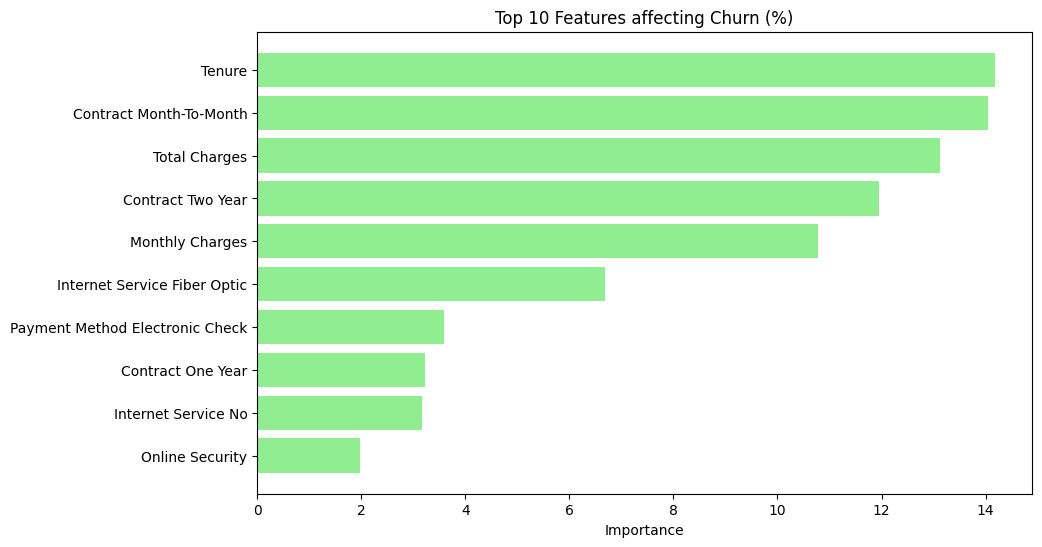

In [29]:
preprocessor = rf_model.named_steps["prep"]
rf_model_final = rf_model.named_steps["model"]
feature_names = preprocessor.get_feature_names_out()
feature_importances = rf_model_final.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": [col.split("__")[1] for col in feature_names.tolist()],
    "importance": feature_importances
}).sort_values(by="importance", ascending=False).head(10).sort_values(by = "importance", ascending = True)

plt.figure(figsize = (10, 6))
plt.barh(feature_importance_df["feature"].str.replace("_", " ").str.title(), feature_importance_df["importance"]*100, color = "lightgreen")
plt.title("Top 10 Features affecting Churn (%)")
plt.xlabel("Importance")
plt.show()

# Saving Best Model

In [30]:
import joblib

joblib.dump(rf_pipeline, r"C:\Users\admin\Desktop\ML\ML_projects\customer_churn_prediction\churn_model.pkl")

['C:\\Users\\admin\\Desktop\\ML\\ML_projects\\customer_churn_prediction\\churn_model.pkl']